In [99]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.metrics import mean_absolute_error

In [2]:
# Get current working directory
os.getcwd()
# Change current working directory to one folder up
os.chdir('..')
# Check current working directory is as expected
os.getcwd()

'/home/moc0/ai-vegetation-fuel'

In [3]:
# H2O AutoML framework for benchmarking
import h2o
from h2o.automl import H2OAutoML
h2o.init(max_mem_size = 32)

Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
  Java Version: java version "1.8.0_291"; Java(TM) SE Runtime Environment (build 1.8.0_291-b10); Java HotSpot(TM) 64-Bit Server VM (build 25.291-b10, mixed mode)
  Starting server from /home/moc0/miniconda3/envs/ml-fuel/lib/python3.8/site-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpt0vnwqkh
  JVM stdout: /tmp/tmpt0vnwqkh/h2o_moc0_started_from_python.out
  JVM stderr: /tmp/tmpt0vnwqkh/h2o_moc0_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,02 secs
H2O_cluster_timezone:,UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.32.1.1
H2O_cluster_version_age:,1 month and 18 days
H2O_cluster_name:,H2O_from_python_moc0_yz6j5n
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,28.44 Gb
H2O_cluster_total_cores:,16
H2O_cluster_allowed_cores:,16
H2O_cluster_status:,"accepting new members, healthy"


# Run benchmark tests

In [186]:
# Load raw train data
train = pd.read_csv(os.getcwd() + "/data/inputs/train_raw_interpTrue.csv",
                    dtype={'climatic_region':'category',
                           'biome':'category',
                           'GFEDregions':'category'})

# Load raw test data
test = pd.read_csv(os.getcwd() + "/data/inputs/test_raw_interpTrue.csv",
                    dtype={'climatic_region':'category',
                           'biome':'category',
                           'GFEDregions':'category'})

In [187]:
train = train.drop('Unnamed: 0', axis = 1)
test = test.drop('Unnamed: 0', axis = 1)

In [188]:
target = "log" # It can be "raw" and "log"

if target == "log":
    # Log-transform outcome variable
    train['fuel_load'] = np.log(train['fuel_load'])
    test['fuel_load'] = np.log(test['fuel_load'])
    # Log-transform some predictors
    train['slope'] = np.log(train['slope'])
    test['slope'] = np.log(test['slope'])

In [189]:
# Define outcome variable
y = 'fuel_load'

# categorical features
cat_cols = ['climatic_region', 'biome', 'GFEDregions']

# Numerical features
# non redundant features
num_cols_nr = ['latitude', 'longitude', 'slope', 'vod', 'lai', 'spi03', 'spi06', 'spi12', 'd2m', 'erate',
               'fg10', 'si10', 'swvl1', 't2m', 'tprate', 'danger_risk', 'fwinx', 'ffmcode', 'dufmcode',
               'drtcode', 'infsinx', 'frp', 'daysElapsed', 'timeMonth']
# possibly redundant features
num_cols_r = ['timeYear', 'fbupinx', 'fdsrte']
num_cols = num_cols_nr + num_cols_r

# Columns to include as features of the model
x = [y] + cat_cols + num_cols_nr + num_cols_r # all features
x_nr = [y] + cat_cols + num_cols_nr # non redundant features

In [190]:
# data normalization with sklearn
from sklearn.preprocessing import MinMaxScaler

# copy of datasets
train_norm = train.copy()
test_norm = test.copy()

# apply normalization on numerical features
for i in num_cols:
    
    # fit on training data column
    norm = MinMaxScaler().fit(train_norm[[i]])
    
    # transform the training data column
    train_norm[i] = norm.transform(train_norm[[i]])
    
    # transform the testing data column
    test_norm[i] = norm.transform(test_norm[[i]])

array([[<AxesSubplot:title={'center':'latitude'}>,
        <AxesSubplot:title={'center':'longitude'}>,
        <AxesSubplot:title={'center':'fuel_load'}>,
        <AxesSubplot:title={'center':'slope'}>,
        <AxesSubplot:title={'center':'vod'}>],
       [<AxesSubplot:title={'center':'lai'}>,
        <AxesSubplot:title={'center':'spi03'}>,
        <AxesSubplot:title={'center':'spi06'}>,
        <AxesSubplot:title={'center':'spi12'}>,
        <AxesSubplot:title={'center':'d2m'}>],
       [<AxesSubplot:title={'center':'erate'}>,
        <AxesSubplot:title={'center':'fg10'}>,
        <AxesSubplot:title={'center':'si10'}>,
        <AxesSubplot:title={'center':'swvl1'}>,
        <AxesSubplot:title={'center':'t2m'}>],
       [<AxesSubplot:title={'center':'tprate'}>,
        <AxesSubplot:title={'center':'danger_risk'}>,
        <AxesSubplot:title={'center':'fwinx'}>,
        <AxesSubplot:title={'center':'ffmcode'}>,
        <AxesSubplot:title={'center':'dufmcode'}>],
       [<AxesSubplot:ti

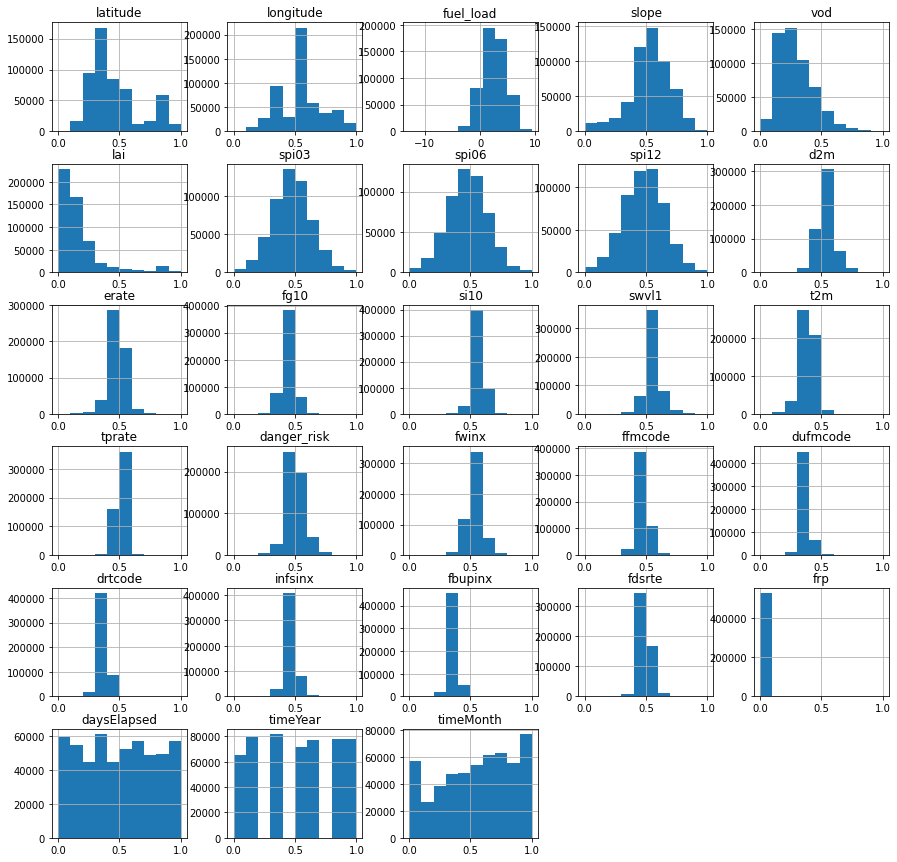

In [191]:
train_norm.hist(figsize = (15,15))

In [192]:
# data standardization with  sklearn
from sklearn.preprocessing import StandardScaler

# copy of datasets
train_stand = train.copy()
test_stand = test.copy()

# apply standardization on numerical features
for i in num_cols:
    
    # fit on training data column
    scale = StandardScaler().fit(train_stand[[i]])
    
    # transform the training data column
    train_stand[i] = scale.transform(train_stand[[i]])
    
    # transform the testing data column
    test_stand[i] = scale.transform(test_stand[[i]])

array([[<AxesSubplot:title={'center':'latitude'}>,
        <AxesSubplot:title={'center':'longitude'}>,
        <AxesSubplot:title={'center':'fuel_load'}>,
        <AxesSubplot:title={'center':'slope'}>,
        <AxesSubplot:title={'center':'vod'}>],
       [<AxesSubplot:title={'center':'lai'}>,
        <AxesSubplot:title={'center':'spi03'}>,
        <AxesSubplot:title={'center':'spi06'}>,
        <AxesSubplot:title={'center':'spi12'}>,
        <AxesSubplot:title={'center':'d2m'}>],
       [<AxesSubplot:title={'center':'erate'}>,
        <AxesSubplot:title={'center':'fg10'}>,
        <AxesSubplot:title={'center':'si10'}>,
        <AxesSubplot:title={'center':'swvl1'}>,
        <AxesSubplot:title={'center':'t2m'}>],
       [<AxesSubplot:title={'center':'tprate'}>,
        <AxesSubplot:title={'center':'danger_risk'}>,
        <AxesSubplot:title={'center':'fwinx'}>,
        <AxesSubplot:title={'center':'ffmcode'}>,
        <AxesSubplot:title={'center':'dufmcode'}>],
       [<AxesSubplot:ti

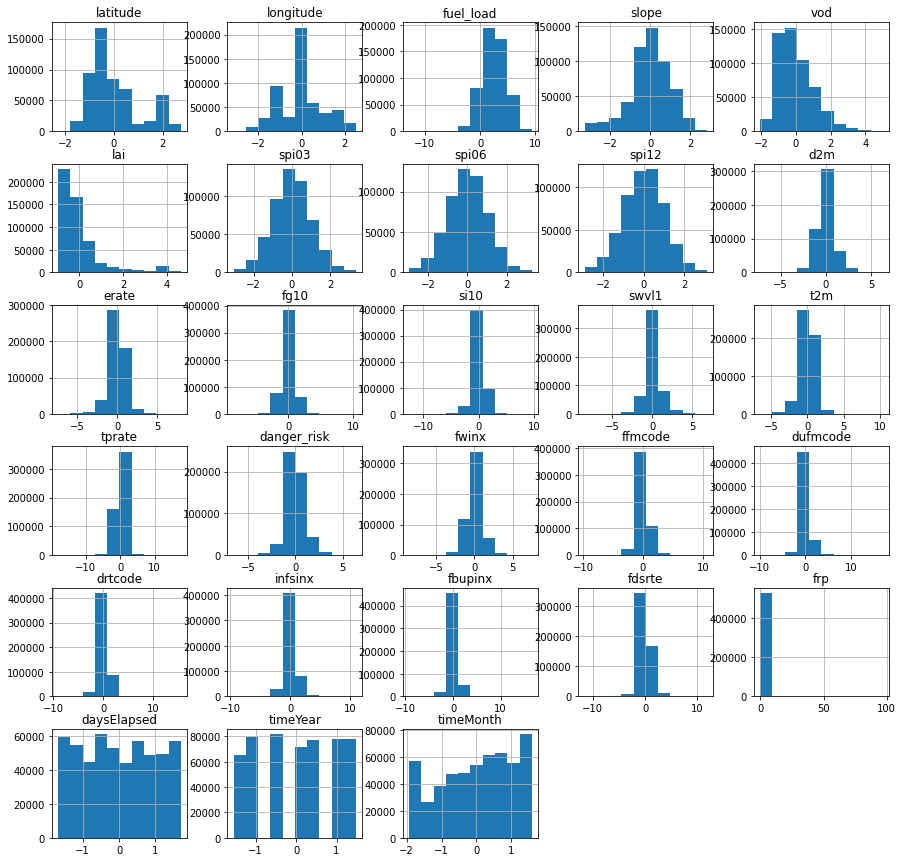

In [193]:
train_stand.hist(figsize = (15,15))

In [194]:
# PowerTransform with sklearn
from sklearn.preprocessing import PowerTransformer

# copy of datasets
train_yj = train.copy()
test_yj = test.copy()

# apply transformation on numerical features
for i in num_cols:
    
    # fit on training data column
    yj = PowerTransformer().fit(train_yj[[i]])
    
    # transform the training data column
    train_yj[i] = yj.transform(train_yj[[i]])
    
    # transform the testing data column
    test_yj[i] = yj.transform(test_yj[[i]])

array([[<AxesSubplot:title={'center':'latitude'}>,
        <AxesSubplot:title={'center':'longitude'}>,
        <AxesSubplot:title={'center':'fuel_load'}>,
        <AxesSubplot:title={'center':'slope'}>,
        <AxesSubplot:title={'center':'vod'}>],
       [<AxesSubplot:title={'center':'lai'}>,
        <AxesSubplot:title={'center':'spi03'}>,
        <AxesSubplot:title={'center':'spi06'}>,
        <AxesSubplot:title={'center':'spi12'}>,
        <AxesSubplot:title={'center':'d2m'}>],
       [<AxesSubplot:title={'center':'erate'}>,
        <AxesSubplot:title={'center':'fg10'}>,
        <AxesSubplot:title={'center':'si10'}>,
        <AxesSubplot:title={'center':'swvl1'}>,
        <AxesSubplot:title={'center':'t2m'}>],
       [<AxesSubplot:title={'center':'tprate'}>,
        <AxesSubplot:title={'center':'danger_risk'}>,
        <AxesSubplot:title={'center':'fwinx'}>,
        <AxesSubplot:title={'center':'ffmcode'}>,
        <AxesSubplot:title={'center':'dufmcode'}>],
       [<AxesSubplot:ti

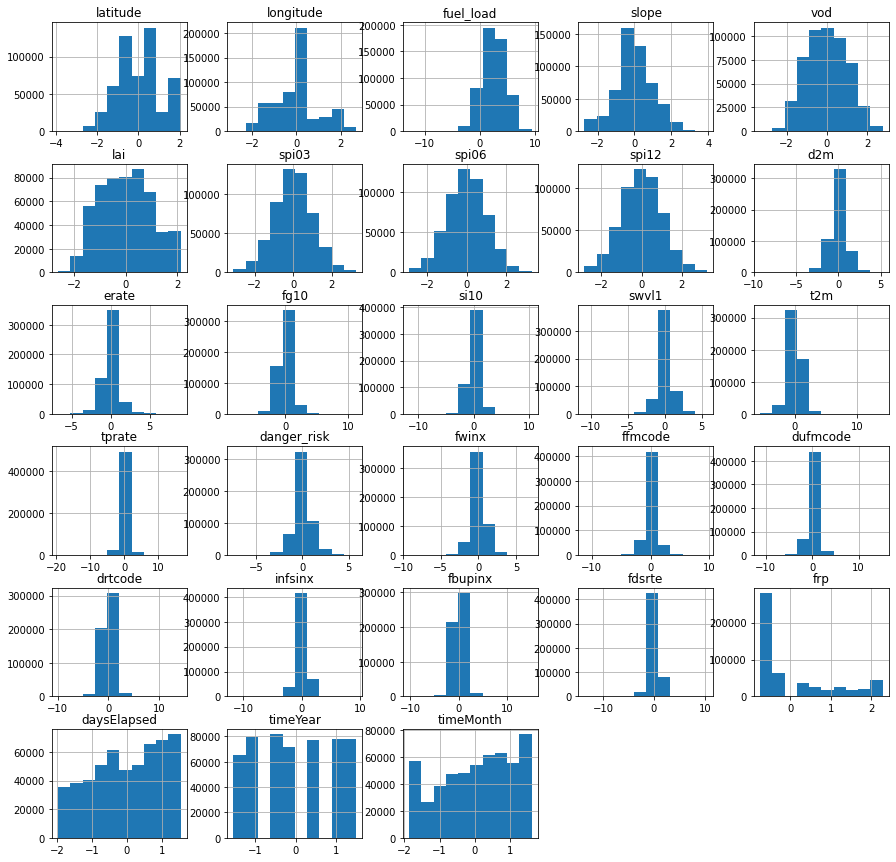

In [195]:
train_yj.hist(figsize = (15,15))

In [196]:
# Define a list of datasets to work with
trainX = [h2o.H2OFrame(train[x]), h2o.H2OFrame(train_norm[x]), h2o.H2OFrame(train_stand[x]), h2o.H2OFrame(train_yj[x]),
          h2o.H2OFrame(train[x_nr]), h2o.H2OFrame(train_norm[x_nr]), h2o.H2OFrame(train_stand[x_nr]), h2o.H2OFrame(train_yj[x_nr])]
testX = [h2o.H2OFrame(test[x]), h2o.H2OFrame(test_norm[x]), h2o.H2OFrame(test_stand[x]), h2o.H2OFrame(test_yj[x]),
         h2o.H2OFrame(test[x_nr]), h2o.H2OFrame(test_norm[x_nr]), h2o.H2OFrame(test_stand[x_nr]), h2o.H2OFrame(test_yj[x_nr])]

Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |███████████

In [197]:
# model fitting and measuring the model metric
mae = []
for i in range(len(trainX)):
    # Define Regressor model
    aml = H2OAutoML(max_runtime_secs = 10*60, seed = 1, stopping_metric = "mae",
                    preprocessing = ["target_encoding"]) # TE is not necessary, I leave it here for future use
    # Fit
    aml.train(y = y, training_frame = trainX[i])
    # Get performance
    if target == "raw":
        perf = aml.leader.model_performance(testX[i])
        mae.append(perf.mae())
    if target == "log":
        preds = aml.predict(testX[i])
        obs = testX[i]['fuel_load']
        mae.append(mean_absolute_error(np.exp(obs.as_data_frame()), np.exp(preds.as_data_frame())))

AutoML progress: |████████████████████████████████████████████████████████| 100%
stackedensemble prediction progress: |████████████████████████████████████| 100%
AutoML progress: |████████████████████████████████████████████████████████| 100%
stackedensemble prediction progress: |████████████████████████████████████| 100%
AutoML progress: |████████████████████████████████████████████████████████| 100%
stackedensemble prediction progress: |████████████████████████████████████| 100%
AutoML progress: |████████████████████████████████████████████████████████| 100%
stackedensemble prediction progress: |████████████████████████████████████| 100%
AutoML progress: |████████████████████████████████████████████████████████| 100%
stackedensemble prediction progress: |████████████████████████████████████| 100%
AutoML progress: |████████████████████████████████████████████████████████| 100%
stackedensemble prediction progress: |████████████████████████████████████| 100%
AutoML progress: |██████████

In [198]:
# visualizing the result
df = pd.DataFrame({'MAE':mae},
                  index=['Original - All Features', 'Normalized - All features','Standardized  - All features', 'Y-J - All features',
                         'Original - Non-redundant Features', 'Normalized - Non-redundant features','Standardized  - Non-redundant features', 'Y-J - Non-redundant features'])
df

,MAE
Original - All Features,47.969016
Normalized - All features,47.937777
Standardized - All features,48.052273
Y-J - All features,47.936628
Original - Non-redundant Features,48.044175
Normalized - Non-redundant features,47.833347
Standardized - Non-redundant features,48.251351
Y-J - Non-redundant features,47.953598


In [199]:
print(df.to_latex(index=True))

\begin{tabular}{lr}
\toprule
{} &        MAE \\
\midrule
Original - All Features                &  47.969016 \\
Normalized - All features              &  47.937777 \\
Standardized  - All features           &  48.052273 \\
Y-J - All features                     &  47.936628 \\
Original - Non-redundant Features      &  48.044175 \\
Normalized - Non-redundant features    &  47.833347 \\
Standardized  - Non-redundant features &  48.251351 \\
Y-J - Non-redundant features           &  47.953598 \\
\bottomrule
\end{tabular}

